# NASA & Nearest Earth Objects

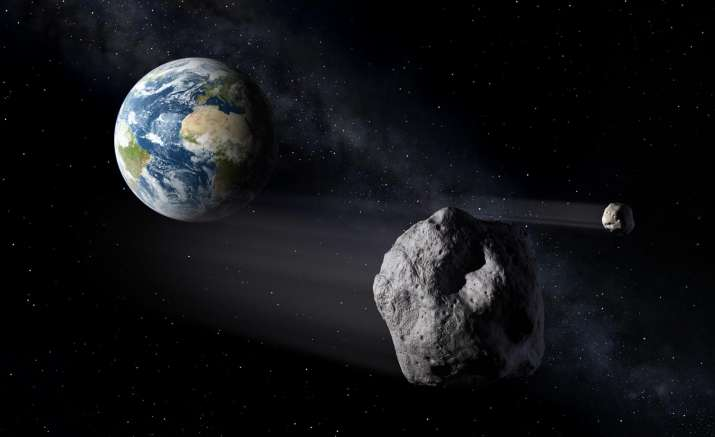

### NASA & Nearest Earth Objects

* Load dataset
* Inspecting the dataset
* Preprocessing the data
* Preprocessing & Data Viz
* Splitting the dataset into train and test sets
* Fitting and Making predictions XG Boost Model
* Fitting and Making predictions KNN Model
* Fitting and Making predictions RandomForst Model
* Fitting and Making predictions Gaussian Naive Bayes Model
* Fitting and Making predictions DecisionTree Model
* Fitting and Making predictions Display all models
* Making predictions and evaluating performance
* Display all models







In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

#### Load dataset 

In [2]:
df = pd.read_csv('/kaggle/input/nasa-nearest-earth-objects/neo.csv')

#### Inspecting the dataset

In [3]:
# Instpect Data 
df.shape

(90836, 10)

In [4]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [5]:
# check null values
df.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


<AxesSubplot:>

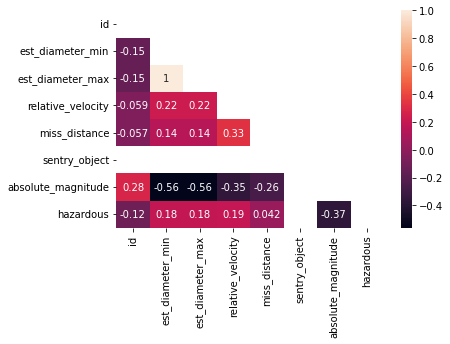

In [7]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(),mask = mask ,annot=True)

#### Preprocessing & Data Viz

In [8]:
# remove those two columns
df = df.drop(['orbiting_body','sentry_object'], axis=1)
df


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,27.80,False


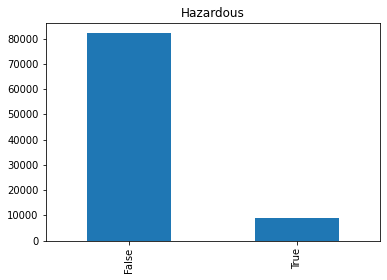

In [9]:
# plot distribution of Hazardous
df.hazardous.value_counts().plot(kind='bar')
plt.title('Hazardous')
plt.show()

In [10]:
# Separate Numeric Data 
numeric_df = ["est_diameter_min","est_diameter_max","relative_velocity","miss_distance","absolute_magnitude"]
df[numeric_df].describe()

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


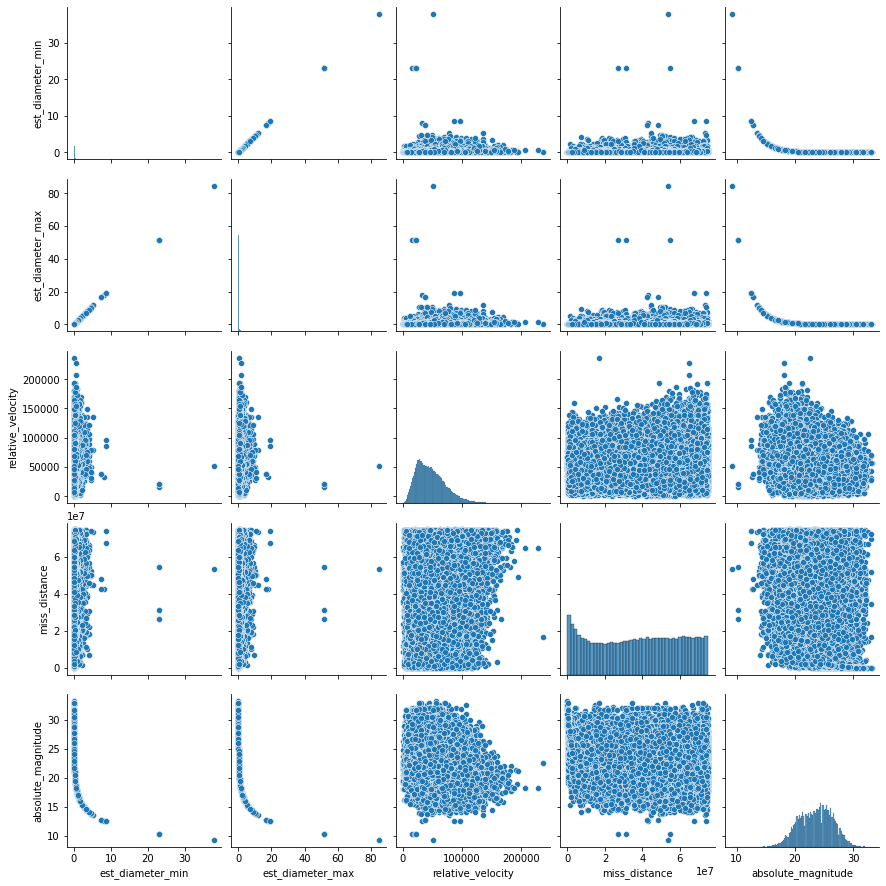

In [11]:
# create pairplot To plot multiple pairwise bivariate distributions in a dataset
fig= sns.pairplot(df[numeric_df])

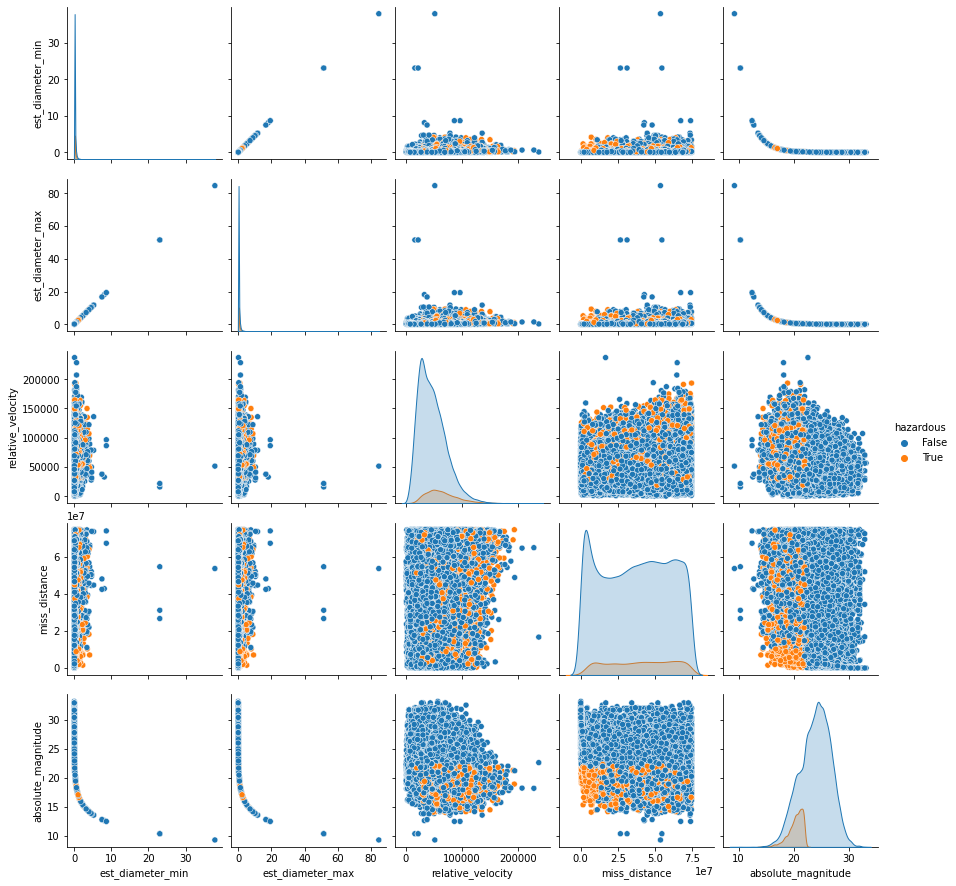

In [12]:
# create pairplot To plot multiple pairwise bivariate distributions with hazardous
fig= sns.pairplot(df[numeric_df+['hazardous']],hue = 'hazardous')

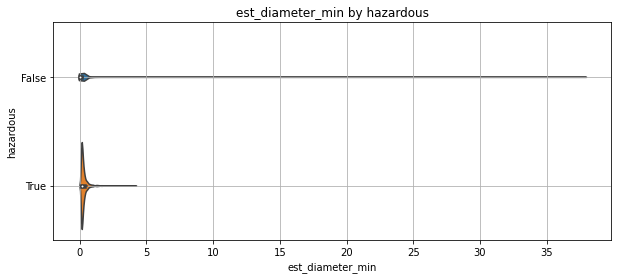

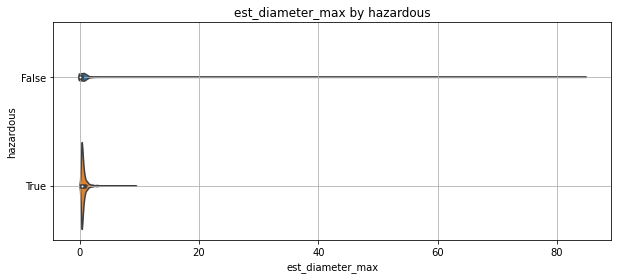

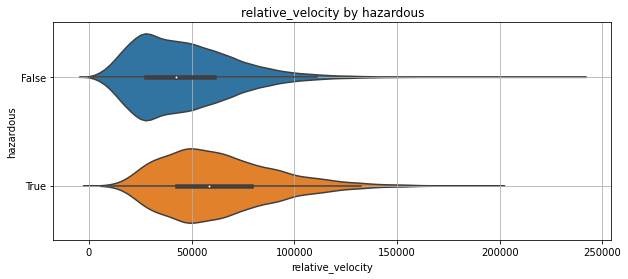

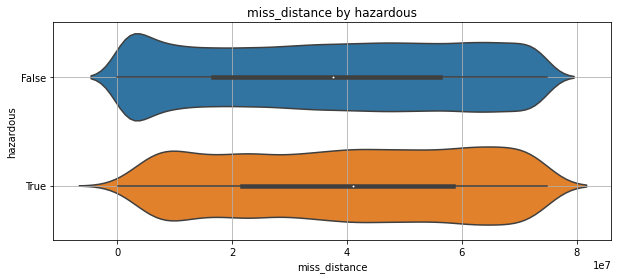

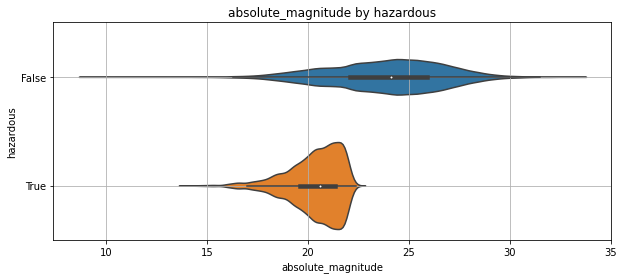

In [13]:
for k in numeric_df:
    plt.figure(figsize=(10,4))
    sns.violinplot(data=df, x=k, y='hazardous', orient='h')
    title = k + ' by hazardous'
    plt.title(title)
    plt.grid()

### Splitting the dataset into train and test sets

In [14]:
# Split into x and y ,Irrelevant features dropped
x = df.drop(["id","name",'est_diameter_max',"est_diameter_max",'hazardous',"miss_distance","absolute_magnitude"] , axis = 1)


In [15]:
# Hazardous Transformed into int
y = df.hazardous.astype("int")
print(x.shape, y.shape)

(90836, 2) (90836,)


In [16]:
# Train & Test Splitting
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

### Models

In [17]:
# XG Boost Model
XGBC = XGBClassifier()
XGBC.fit(X_train, y_train)
XGBC_pred = XGBC.predict(X_test)
Acc_XGBC = round(accuracy_score(XGBC_pred, y_test) * 100,2)
print(Acc_XGBC)

91.14


In [18]:
# KNN Model
KNN = KNeighborsClassifier(n_neighbors = 3)
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)
Acc_KNN = round(accuracy_score(KNN_pred, y_test) * 100, 2)
print(Acc_KNN)

87.51


In [19]:
# RandomForst Model
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)
Acc_RF = round(accuracy_score(RF_pred, y_test) * 100, 2)
print(Acc_RF)

89.54


In [20]:
# Gaussian Naive Bayes Model
GNB = GaussianNB()
GNB.fit(X_train, y_train)
GNB_pred = GNB.predict(X_test)
Acc_GNB = round(accuracy_score(GNB_pred,y_test) * 100, 2)
print(Acc_GNB)

89.59


In [21]:
# DecisionTree Model

DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
DTC_pred = DTC.predict(X_test)
Acc_DTC = round(accuracy_score(DTC_pred, y_test) * 100, 2)
print(Acc_DTC)

89.04


### Display all models 

In [22]:
# Print all models

models = pd.DataFrame({
    'Model': ['Random Forest', 'XG Boost', 'Gaussian Naive Bayes', 
              'KNeighborsClassifier', 'DecisionTreeClassifier'],
    'Score': [Acc_RF, Acc_XGBC, Acc_GNB, 
              Acc_KNN, Acc_DTC]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,XG Boost,91.14
2,Gaussian Naive Bayes,89.59
0,Random Forest,89.54
4,DecisionTreeClassifier,89.04
3,KNeighborsClassifier,87.51
